In [26]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [19]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [20]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [21]:
# Dicionário de mapeamento de meses para números
mes_para_numero = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

# Aplicando o mapeamento
df_vendas['mes_numerico'] = df_vendas['mes'].map(mes_para_numero)

In [22]:
df_vendas.drop(columns=['mes'], axis=1, inplace=True)

In [33]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   vendas        12 non-null     int64
 1   mes_numerico  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


In [36]:
X = df_vendas['mes_numerico'].values.reshape(-1, 1)
y = df_vendas['vendas']

In [37]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [38]:
# Treinar o algoritmo de Regressão linear
model = LinearRegression().fit(X_train, y_train)

In [39]:
# Gerar predições do conjunto de testes com base no modelo
y_pred = model.predict(X_test)

In [40]:
y_pred

array([2420.        , 2876.66666667, 2305.83333333, 2762.5       ])

In [41]:
model.coef_

array([114.16666667])

In [42]:
model.intercept_

np.float64(1963.3333333333333)

In [43]:
# prever mes de dezembro
vendas_dezembro = model.predict([[12]])

In [44]:
vendas_dezembro

array([3333.33333333])

array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'mes_numerico'}>]], dtype=object)

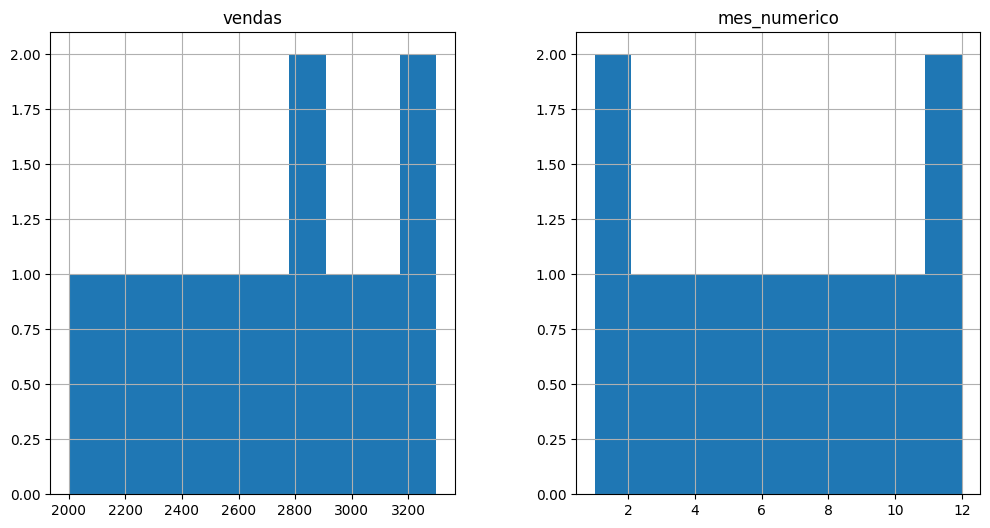

In [49]:
# Histograma de todas as variáveis
df_vendas.hist(figsize=(12, 6), grid=True)

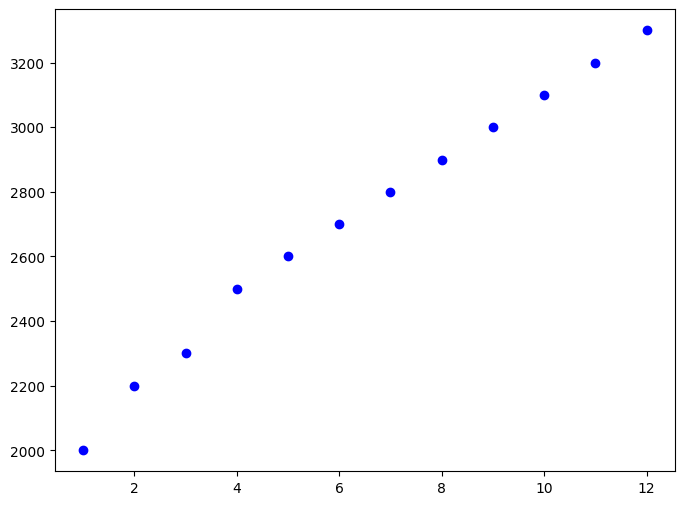

In [52]:
import matplotlib.pyplot as plt

# Plotando o scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_vendas['mes_numerico'], df_vendas['vendas'], color='blue', label='Vendas')
